In [389]:
# Import class for data manipulation and analysis
import pandas as pd
import numpy as np

# Import class for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import class for feature engineering and pipeline creation
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import class for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import class for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import class for evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import cross_val_score

# Import class for feature weights
from shap import TreeExplainer


In [390]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls" -O default_credit_card.xls


--2025-07-31 21:30:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘default_credit_card.xls’

default_credit_card     [               <=>  ]   5.28M  1.62MB/s    in 3.3s    

2025-07-31 21:30:30 (1.62 MB/s) - ‘default_credit_card.xls’ saved [5539328]



In [391]:
df = pd.read_excel('default_credit_card.xls', header=1, index_col=0)

df.rename(columns={'default payment next month': 'default'}, inplace=True) # Rename the target column for clarity
df['default'] = df['default'].astype(int) # Convert the target variable to integer data type
col = df.columns.tolist() # Get the list of columns
df.columns = [c.lower() for c in col] # Update the DataFrame with lowercase column names
df.rename(columns={'pay_0': 'pay_1'}, inplace=True)
df.head(20)


,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


| Variable | Name / Description                                                       | Type           | Values / Notes                                                                 |
|----------|---------------------------------------------------------------------------|----------------|--------------------------------------------------------------------------------|
| Y        | Default Payment Next Month                                               | Binary Target  | 0 = No, 1 = Yes                                                                 |
| limit_bal       | Amount of given credit (NT$)                                             | Numeric        | Includes personal and supplementary credit                                     |
| sex       | Gender                                                                   | Categorical    | 1 = Male, 2 = Female                                                            |
| education       | Education Level                                                          | Categorical    | 1 = Graduate School, 2 = University, 3 = High School, 4 = Others               |
| marriage       | Marital Status                                                           | Categorical    | 1 = Married, 2 = Single, 3 = Others                                             |
| age       | Age (years)                                                              | Numeric        | Age in full years                                                              |
| pay_1 – pay_6   | Repayment status over the last 6 months(1 = most recent month, 6 = 6th month)                                          | Ordinal        | -1 = Pay duly, 1 = payment delay for 1 month, ..., 6 = payment delay for 6+ month                     |
| bill_amt1 – bill_amt6  | Amount of billing statement over the last 6 months (1 = most recent month, 6 = 6th month)                                  | Numeric        | Monthly bill amount (NT$)                                                      |
| pay_amt1 – pay_amt6  | Payment amount of previous payment over the last 6 months (1 = most recent month, 6 = 6th month)                              | Numeric        | Amount paid toward bills (NT$)                                                 |


***
# Data Pre-Processing
***

In [392]:
# Setting all payments marked with -1 or less to 0. 
# Since a payment categorized as 'Pay Duly' means that the payment was made on time
# Therefore the client is 0 months late

for num in range(1, 7):
    df[f'pay_{num}'] = df[f'pay_{num}'].apply(lambda x: 0 if x <= -1 else x)

In [393]:
# Setting the bill statement amount to 0 if it is less than or equal to -1
# This is because a bill statement amount of -1 or less indicates no bill was generated

for num in range(1, 7):
    df[f'bill_amt{num}'] = df[f'bill_amt{num}'].apply(lambda x: 0 if x <= -1 else x)

***
# Exploratory Data Analysis
***

In [394]:
# Checking the data types of each column and the number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   limit_bal  30000 non-null  int64
 1   sex        30000 non-null  int64
 2   education  30000 non-null  int64
 3   marriage   30000 non-null  int64
 4   age        30000 non-null  int64
 5   pay_1      30000 non-null  int64
 6   pay_2      30000 non-null  int64
 7   pay_3      30000 non-null  int64
 8   pay_4      30000 non-null  int64
 9   pay_5      30000 non-null  int64
 10  pay_6      30000 non-null  int64
 11  bill_amt1  30000 non-null  int64
 12  bill_amt2  30000 non-null  int64
 13  bill_amt3  30000 non-null  int64
 14  bill_amt4  30000 non-null  int64
 15  bill_amt5  30000 non-null  int64
 16  bill_amt6  30000 non-null  int64
 17  pay_amt1   30000 non-null  int64
 18  pay_amt2   30000 non-null  int64
 19  pay_amt3   30000 non-null  int64
 20  pay_amt4   30000 non-null  int64
 21  pay_amt5   30000 

In [395]:
# Check the distribution of the target variable
# This will help us understand the balance of the classes
# The curreent distribution shows that the dataset is imbalanced 
df['default'].value_counts(normalize=True)

default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

Text(-3.6805555555555554, 0.5, 'Cedit Limit ($)')

<Figure size 1200x600 with 0 Axes>

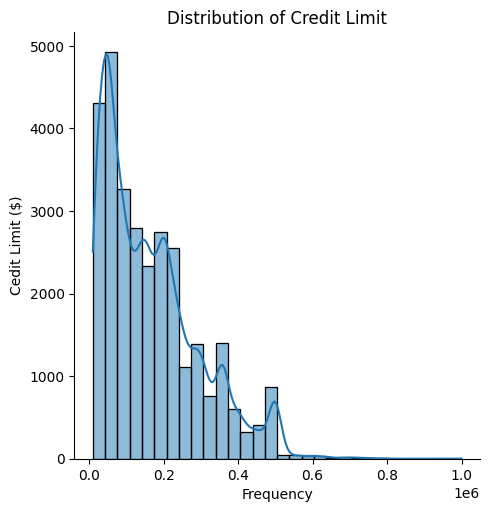

In [396]:
plt.figure(figsize=(12, 6))
sns.displot(df['limit_bal'], kde=True, bins=30)
plt.title('Distribution of Credit Limit')
plt.xlabel('Frequency')
plt.ylabel('Cedit Limit ($)')


/var/folders/dl/q12jywhx4svgdkc33pp48gq80000gn/T/ipykernel_39959/611768751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='limit_bal', data=df, palette='Set2')


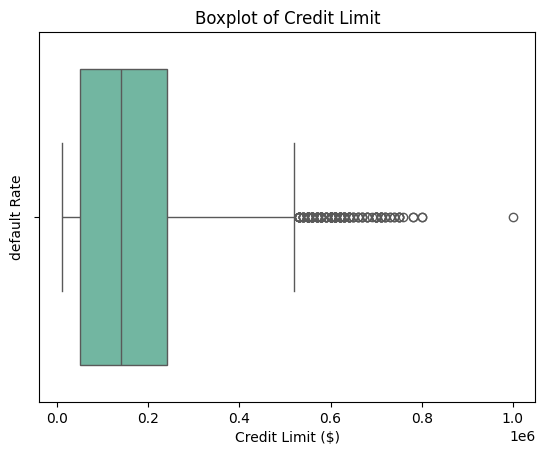

In [397]:
# Boxplot to visualize the distribution of credit limits 
sns.boxplot(x='limit_bal', data=df, palette='Set2')
plt.title('Boxplot of Credit Limit')
plt.xlabel('Credit Limit ($)')
plt.ylabel('default Rate')
plt.show()

In [398]:
def outliers(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1 

    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    ls = df.index[(df[col]<lower_bound)|(df[col]>upper_bound)]
    return ls

In [399]:
# Identify outliers in the 'limit_bal' column. Individuals with credit limits outside the IQR range are considered outliers.
# These outliers may represent individuals with unusually high or low credit limits.
# This can be useful for understanding the distribution of credit limits and identifying potential anomalies in the dataset
# The outliers can be further investigated to understand their impact on the analysis or model performance.

outliers_list = outliers(df, 'limit_bal')
df.iloc[outliers_list]

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
ID,,,,,,,,,,,,,,,,,,,,,
14,70000,1,2,2,30,1,2,2,0,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
435,360000,1,3,1,55,0,0,0,0,0,...,1770,0,0,6015,17454,1775,0,0,0,0
453,260000,1,2,2,37,0,0,0,0,0,...,122388,127402,131074,14000,5022,130000,7000,6000,6000,0
529,360000,1,1,2,26,1,0,0,0,0,...,0,1677,2600,0,0,0,1685,2613,0,0
557,160000,2,1,1,33,0,0,0,0,0,...,350,150,199,5401,1829,350,150,199,1145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29573,210000,1,1,1,40,0,0,0,0,0,...,1967,3952,10330,326,3632,1967,3985,10330,8000,1
29742,100000,1,2,1,32,0,0,0,0,0,...,43360,41906,42831,2454,2700,1712,1500,1600,1600,0
29863,50000,1,2,1,38,0,0,0,0,0,...,4768,0,0,1200,1200,1020,0,0,7000,1


In [400]:
# Checking the default status of outliers to understand their impact on the target variable
# This will help in understanding if outliers are more likely to default or not
# Currently, 20% which is a significant proportion indicating the existence of a relationship between credit limit outliers and default status

df.iloc[outliers_list]['default'].value_counts(normalize=True) 

default
0    0.802395
1    0.197605
Name: proportion, dtype: float64

In [401]:

# Create a new feature 'payment_delinquency' that sums the payment status across all months
# This feature indicates the total number of months a client was delinquent in their payments
# A higher value indicates a higher level of delinquency, which may be associated with a higher risk of default

df['payment_delinquency'] = df[[f'pay_{i}' for i in range(1, 7)]].sum(axis=1)
df.sort_values(by='payment_delinquency', ascending=False)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,payment_delinquency
ID,,,,,,,,,,,,,,,,,,,,,
8655,30000,1,1,1,47,2,2,8,8,8,...,2400,2400,0,0,0,0,0,0,1,36
2363,20000,1,2,2,24,8,7,6,5,4,...,21834,21200,0,0,0,0,0,0,0,33
750,50000,2,2,2,25,8,7,6,5,4,...,35229,34365,0,0,1000,0,0,3000,1,33
2917,20000,1,3,2,26,8,7,6,5,4,...,27409,23567,0,0,0,0,0,300,0,33
9980,30000,1,1,1,38,8,7,6,5,4,...,31881,31085,0,0,0,0,0,0,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12031,50000,1,2,2,37,0,0,0,0,0,...,28709,29793,2020,2010,2000,2000,2000,2000,1,0
12027,20000,2,2,3,52,0,0,0,0,0,...,18949,17426,1331,1270,633,655,759,547,1,0
12026,180000,2,3,1,35,0,0,0,0,0,...,26614,27528,3514,3569,3204,1000,1310,4459,0,0


In [402]:
# Create a new feature 'credit_utilization' that calculates the ratio of the bill amount to the credit limit
# This feature indicates how much of the credit limit is being utilized by the client
# A higher value indicates a higher level of credit utilization, which may be associated with a higher risk of default

df['credit_utilization'] = df['bill_amt1']/df['limit_bal']

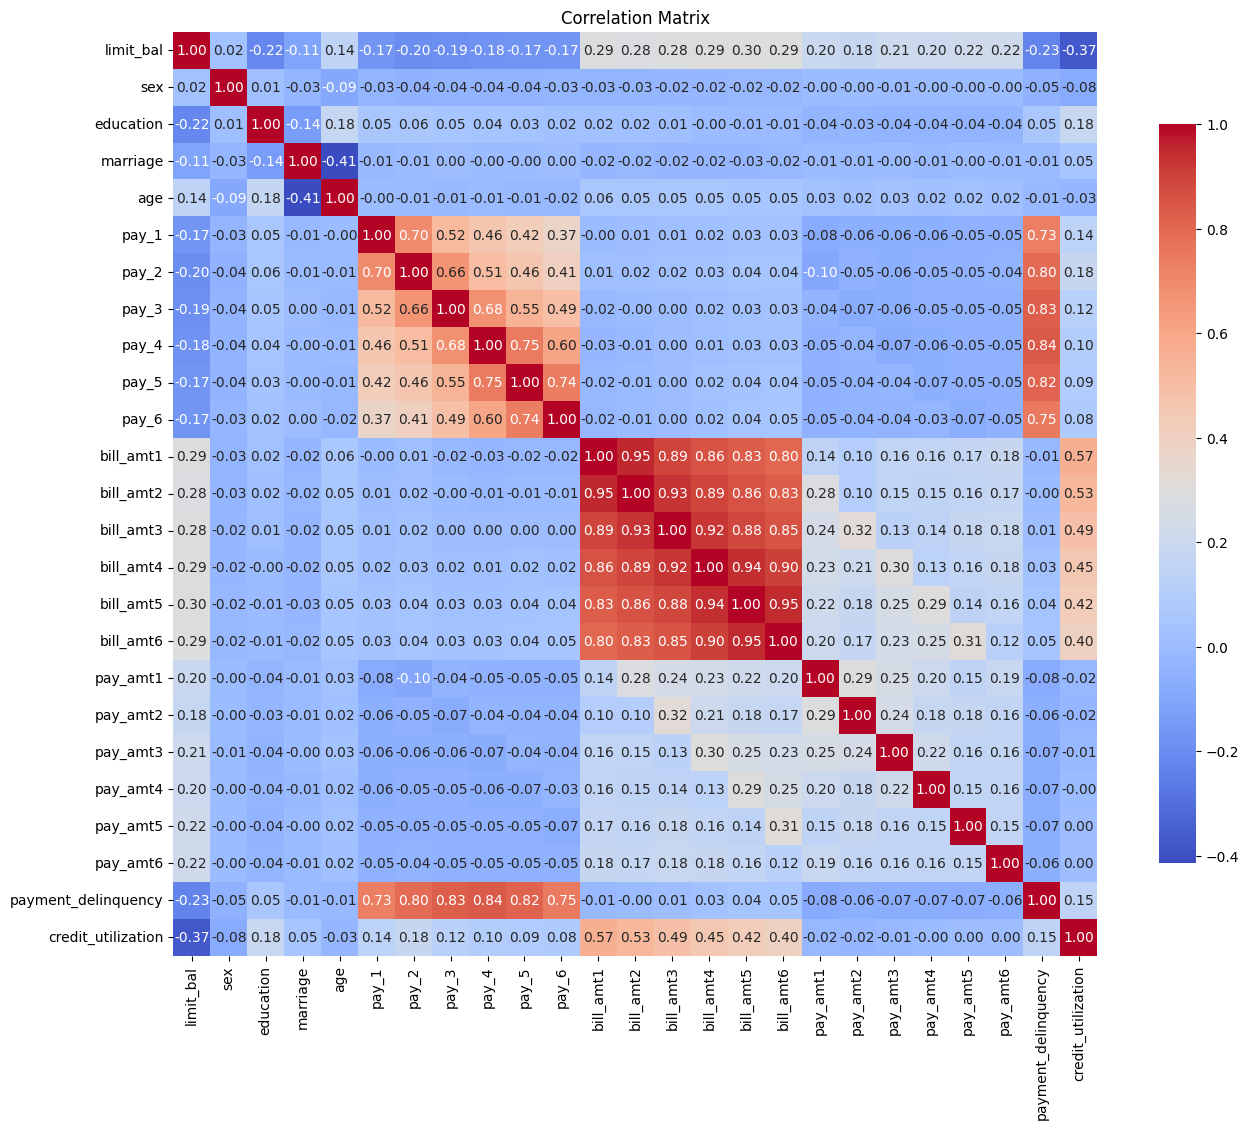

In [403]:
# Calculate the correlation matrix excluding the target variable
# This will help in understanding the relationships between features
# In the Heatmap there's strong correlation for features 'pay_1' - 'pay_6' and 'bill_amt1' - 'bill_amt6'
# Suprisingly, limit balance has a relatively low correlation to the other features

corr = df.drop(columns=['default']).corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix')
plt.show()

In [404]:
# Gathering all features with the highest correlation from the correlation matrix
# The process is the following:
# 1. Calculate the correlation matrix excluding the target variable.
df_corr = df.drop(columns=['default']).corr(method='pearson')

# 2. Unstack the correlation matrix to get pairs of features and their correlation values.
corr_pairs = df_corr.unstack()

# 3. Remove self-correlations (where a variable is correlated with itself).
corr_pairs = corr_pairs[corr_pairs < 1]

# 4. Drop duplicate pairs (e.g., if A is correlated with B, we only keep one of A-B or B-A).
corr_pairs = corr_pairs.drop_duplicates()

# 5. Filter for pairs with a high correlation value (e.g., greater than 0.2).
high_corr = corr_pairs[corr_pairs > 0.2].sort_values(ascending=False)

# 6. Reset the index for better readability and display.
high_corr_df = high_corr.reset_index()
high_corr_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

unique_vars = pd.unique(
    np.concatenate([
    high_corr_df['Variable 1'].values,
    high_corr_df['Variable 2'].values
]))

feature_list = unique_vars.tolist()
feature_list.sort()

print(feature_list)

['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'credit_utilization', 'limit_bal', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'payment_delinquency']


***
# Pipeline Setup & Baseline Modeling
***

In [405]:
excluded_features = ['limit_bal', 'credit_utilization']
excluded_list = list(filter(lambda x: x != excluded_features, feature_list))
excluded_feature_indices = [feature_list.index(excluded_feat[0:(len(excluded_feat))]) for excluded_feat in excluded_features]

# Define the feature list for preprocessing
# It has been observered that the presences of outliers exist in the features being used
# Therefore, RobustScaler will be used to scale that features. 
# Alls features except 'limit_bal' will be scaled using StandardScaler 

preprocessor = ColumnTransformer(
    transformers=[('std_num', StandardScaler(), excluded_list), 
                  ('outliers', RobustScaler(), feature_list[excluded_feature_indices[0]:len(excluded_feature_indices)])],
    remainder='passthrough'
    )

In [406]:
x_train, x_test, y_train, y_test = train_test_split(
    df[feature_list],
    df['default'], 
    test_size = .2,
    # Ensuring the same proportion of classes in train and test sets since the target variable is imbalanced
    stratify = df['default'], 
    random_state = 42,
    )

In [407]:
# Creating pipelines for each model with the preprocessor

pipe_svc = Pipeline(
    steps=[('preprocessor', preprocessor), 
           ('baseline_svc', SVC(C = 1, kernel = 'rbf', gamma = 'auto'))
           ]
           )

pipe_rf = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('baseline_random_forest', RandomForestClassifier(n_estimators = 10, class_weight='balanced'))
           ]
           )

pipe_lr = Pipeline(
    steps=[('preprocessor', preprocessor), 
           ('baseline_logistic_regression', LogisticRegression(class_weight='balanced'))
           ]
           )

pipe_knn = Pipeline(
    steps=[('preprocessor', preprocessor), 
           ('baseline_knn', KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'euclidean'))
           ]
           )

pipe_gb = Pipeline(
    steps=[('preprocessor', preprocessor), 
           ('baseline_gradient_boost', GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42))
           ]
           )

In [408]:
# Function to print the metrics of the classifier
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        clf.fit(X_train, y_train)
        res = clf.predict(X_train)
        print(f"\nTrain Result: {clf.get_params()['steps'][1][0]} \n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train==False:
        '''
        test performance
        '''
        clf.fit(x_test, y_test)
        res_test = clf.predict(X_test)
        print(f"Test Result: {clf.get_params()['steps'][1][0]}\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        
        

In [409]:
print_score(pipe_svc, x_train, x_test, y_train, y_test, train=True)
print_score(pipe_rf, x_train, x_test, y_train, y_test, train=True)
print_score(pipe_knn, x_train, x_test, y_train, y_test, train=True)
print_score(pipe_lr, x_train, x_test, y_train, y_test, train=True)
print_score(pipe_gb, x_train, x_test, y_train, y_test, train=True)




Train Result: baseline_svc 

accuracy score: 0.8260

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.90     18691
           1       0.70      0.38      0.49      5309

    accuracy                           0.83     24000
   macro avg       0.77      0.67      0.69     24000
weighted avg       0.81      0.83      0.81     24000


Confusion Matrix: 
 [[17814   877]
 [ 3298  2011]]

ROC AUC: 0.6659

Average Accuracy: 	 0.8201
Accuracy SD: 		 0.0070

Train Result: baseline_random_forest 

accuracy score: 0.9657

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     18691
           1       0.94      0.91      0.92      5309

    accuracy                           0.97     24000
   macro avg       0.95      0.95      0.95     24000
weighted avg       0.97      0.97      0.97     24000


Confusion Matrix: 
 [[18357   334]
 [  488  4821]]

ROC A

In [410]:
rf_estimator = RandomForestClassifier(random_state =42)

rf_param_distributions = {
        'n_estimators': list(np.arange(1, 200, 10)),       # Number of trees in the forest
        'max_depth': list(np.arange(1, 20, 1)),            # Maximum depth of the tree
        'min_samples_split': list(np.arange(2, 10, 2)),    # Minimum number of samples required to split an internal node
        'min_samples_leaf': list(np.arange(1, 5, 1)),      # Minimum number of samples required to be at a leaf node
        'class_weight': ['balanced', None],                # Handle class imbalance
        'criterion': ['gini', 'entropy', 'log_loss']       # Criterion for splitting nodes
        }

In [411]:
rf_random_search = RandomizedSearchCV(
    estimator = rf_estimator,
    param_distributions = rf_param_distributions,
    n_iter = 10,
    cv = 5,
    n_jobs = -1,
    scoring = 'roc_auc',    # This is the metric we want to optimize see cell below
    random_state = 42
    )

To tune the classifier the goals is to get a threshold agnostic metric that rewards both catching defaulters and discriminating them from non-defaulters. Using ROC-AUC over accuracy as the scoring metric is best because, accuracy merely measures the fraction of correct labels at one fixed threshold, in this case, it doesn’t tell how well the model ranks high-risk versus low-risk customers. The ROC curve plots True Positive Rate (recall) against False Positive Rate over all thresholds, and the AUC summarizes that into a single number between 0.5 (random) and 1.0 (perfect). A high ROC-AUC means the model tends to assign higher scores to actual defaulters than to non-defaulters.

In [412]:
rf_random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [np.int64(1), np.int64(2),
                                                      np.int64(3), np.int64(4),
                                                      np.int64(5), np.int64(6),
                                                      np.int64(7), np.int64(8),
                                                      np.int64(9), np.int64(10),
                                                      np.int64(11),
                                                      np.int64(12),
                                                      np.int64(1...
                                                              np.int64(4),
                                                              np.int64(6),
                                                              np.int64(8)],
                                        'n_estimators': [np.int64(1),
                                                         np.int64(11),
                                                         np.int64(21),
                                                         np.int64(31),
                                                         np.int64(41),
                                                         np.int64(51),
                                                         np.int64(61),
                                                         np.int64(71),
                                                         np.int64(81),
                                                         np.int64(91),
                                                         np.int64(101),
                                                         np.int64(111),
                                                         np.int64(121),
                                                         np.int64(131),
                                                         np.int64(141),
                                                         np.int64(151),
                                                         np.int64(161),
                                                         np.int64(171),
                                                         np.int64(181),
                                                         np.int64(191)]},
                   random_state=42, scoring='roc_auc')

In [413]:
print(f'Best parameters found: {rf_random_search.best_params_}')
print(f'Best cross-validation score: {rf_random_search.best_score_:.4f}')

Best parameters found: {'n_estimators': np.int64(131), 'min_samples_split': np.int64(4), 'min_samples_leaf': np.int64(3), 'max_depth': np.int64(8), 'criterion': 'gini', 'class_weight': 'balanced'}
Best cross-validation score: 0.7834


In [414]:
rf_best_model = rf_random_search.best_estimator_
print(f'Best estimator: {rf_best_model}')

Best estimator: RandomForestClassifier(class_weight='balanced', max_depth=np.int64(8),
                       min_samples_leaf=np.int64(3),
                       min_samples_split=np.int64(4),
                       n_estimators=np.int64(131), random_state=42)


In [415]:
pipe_rf_best_model = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('optimize_random_forest', rf_best_model)
           ]
           )

In [416]:
gb_estimator = GradientBoostingClassifier(random_state =42)

In [417]:
gb_param_distributions = {
        'n_estimators': list(np.arange(10, 200, 10)),   # Number of boosting stages
        'learning_rate': list(np.arange(0.1, 1, .1 )),  # Step size shrinkage
        'max_depth': list(np.arange(1, 20, 1)),         # Maximum depth of the individual regression estimators
        'min_samples_leaf': list(np.arange(1, 20, 1)),  # Minimum number of samples required to be at a leaf node
        'subsample': list(np.arange(.01, .06, .01))     # Subsample ratio of the training instance
}


In [418]:
gb_random_search = RandomizedSearchCV(
    estimator = gb_estimator,
    param_distributions = gb_param_distributions,
    n_iter = 10,
    cv = 5,
    n_jobs = -1,
    scoring = 'roc_auc',    # This is the metric we want to optimize
    random_state = 42
    )

In [419]:
gb_random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [np.float64(0.1),
                                                          np.float64(0.2),
                                                          np.float64(0.30000000000000004),
                                                          np.float64(0.4),
                                                          np.float64(0.5),
                                                          np.float64(0.6),
                                                          np.float64(0.7000000000000001),
                                                          np.float64(0.8),
                                                          np.float64(0.9)],
                                        'max_depth': [np.int64(1), np.int64(2),
                                                      np.int64(3)...
                                                         np.int64(40),
                                                         np.int64(50),
                                                         np.int64(60),
                                                         np.int64(70),
                                                         np.int64(80),
                                                         np.int64(90),
                                                         np.int64(100),
                                                         np.int64(110),
                                                         np.int64(120),
                                                         np.int64(130),
                                                         np.int64(140),
                                                         np.int64(150),
                                                         np.int64(160),
                                                         np.int64(170),
                                                         np.int64(180),
                                                         np.int64(190)],
                                        'subsample': [np.float64(0.01),
                                                      np.float64(0.02),
                                                      np.float64(0.03),
                                                      np.float64(0.04),
                                                      np.float64(0.05)]},
                   random_state=42, scoring='roc_auc')

In [420]:
print(f'Best parameters found: {gb_random_search.best_params_}')
print(f'Best cross-validation score: {gb_random_search.best_score_:.4f}')

Best parameters found: {'subsample': np.float64(0.03), 'n_estimators': np.int64(130), 'min_samples_leaf': np.int64(2), 'max_depth': np.int64(1), 'learning_rate': np.float64(0.5)}
Best cross-validation score: 0.7312


In [421]:
gb_best_model = gb_random_search.best_estimator_
print(f'Best estimator: {gb_best_model}')

Best estimator: GradientBoostingClassifier(learning_rate=np.float64(0.5), max_depth=np.int64(1),
                           min_samples_leaf=np.int64(2),
                           n_estimators=np.int64(130), random_state=42,
                           subsample=np.float64(0.03))


In [422]:
pipe_gb_best_model = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('optimize_gradient_boost', gb_best_model)
           ]
           )

***
# Model Comparison
Comparing the performance of the two classifiers, the Optimized Random Forest Classifier performed significantly better on both the train and test data.
***

In [423]:
print_score(pipe_rf_best_model, x_train, x_test, y_train, y_test, train=True)


Train Result: optimize_random_forest 

accuracy score: 0.7962

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.84      0.86     18691
           1       0.53      0.65      0.58      5309

    accuracy                           0.80     24000
   macro avg       0.71      0.74      0.72     24000
weighted avg       0.81      0.80      0.80     24000


Confusion Matrix: 
 [[15664  3027]
 [ 1864  3445]]

ROC AUC: 0.7435

Average Accuracy: 	 0.7742
Accuracy SD: 		 0.0097


In [424]:
print_score(pipe_rf_best_model, x_train, x_test, y_train, y_test, train=False)

Test Result: optimize_random_forest

accuracy score: 0.8238

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      4673
           1       0.59      0.69      0.63      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.78      0.76      6000
weighted avg       0.84      0.82      0.83      6000


Confusion Matrix: 
 [[4027  646]
 [ 411  916]]

ROC AUC: 0.7760



In [425]:
print_score(pipe_gb_best_model, x_train, x_test, y_train, y_test, train=True)


Train Result: optimize_gradient_boost 

accuracy score: 0.8099

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.88     18691
           1       0.62      0.36      0.46      5309

    accuracy                           0.81     24000
   macro avg       0.73      0.65      0.67     24000
weighted avg       0.79      0.81      0.79     24000


Confusion Matrix: 
 [[17507  1184]
 [ 3379  1930]]

ROC AUC: 0.6501

Average Accuracy: 	 0.8055
Accuracy SD: 		 0.0085


In [426]:
print_score(pipe_gb_best_model, x_train, x_test, y_train, y_test, train=False)

Test Result: optimize_gradient_boost

accuracy score: 0.7343

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      4673
           1       0.41      0.45      0.43      1327

    accuracy                           0.73      6000
   macro avg       0.62      0.63      0.63      6000
weighted avg       0.74      0.73      0.74      6000


Confusion Matrix: 
 [[3815  858]
 [ 736  591]]

ROC AUC: 0.6309



***
# Model Interpretation
***

In [427]:
tree_explainer = TreeExplainer(rf_best_model)
shap_values = tree_explainer.shap_values(x_test)

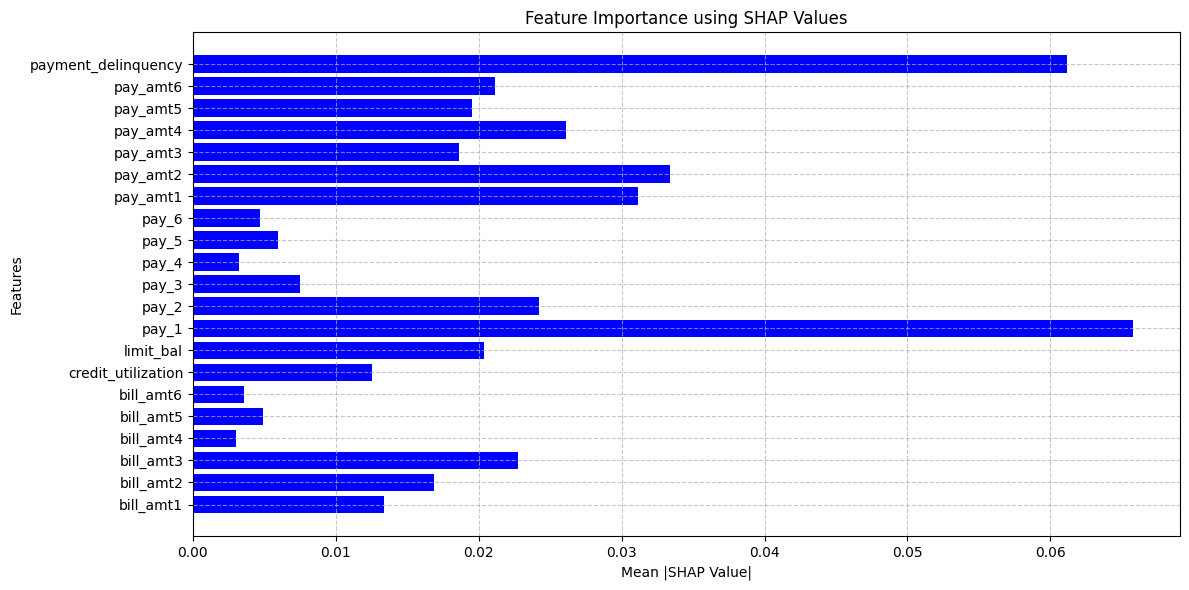

In [428]:
# Extract SHAP values for the positive class (class 1 - default)
shap_values_class1 = shap_values[:, :, 1]

# Calculate mean absolute SHAP values for each feature
mean_shap_values = np.abs(shap_values_class1).mean(axis=0)

plt.figure(figsize=(12, 6))
plt.barh(x_test.columns, mean_shap_values, color='blue')
plt.title('Feature Importance using SHAP Values')
plt.xlabel('Mean |SHAP Value|')
plt.ylabel('Features')
plt.tight_layout()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

***
# Summary: 
### Based on the mean SHAP values, the model indicates that the most important features are:
1. pay_1: The payment status of the first month is the most important
2. payment_delinquency: The total number of months a client was delinquent in their payments
3. pay_amt2: The payment amount in the second month
4. pay_amt1: The payment amount in the first month
5. pay_2: The payment status of the second month
***